In [ ]:
column_names = [
    'tissue',
    'groups',
    'child_10y',
    'tot_child_10y',
    'tot_mass_child_10y',
    'woman',
    'tot_woman',
    'tot_mass_woman',
    'man',
    'tot_man',
    'tot_mass_man'
]

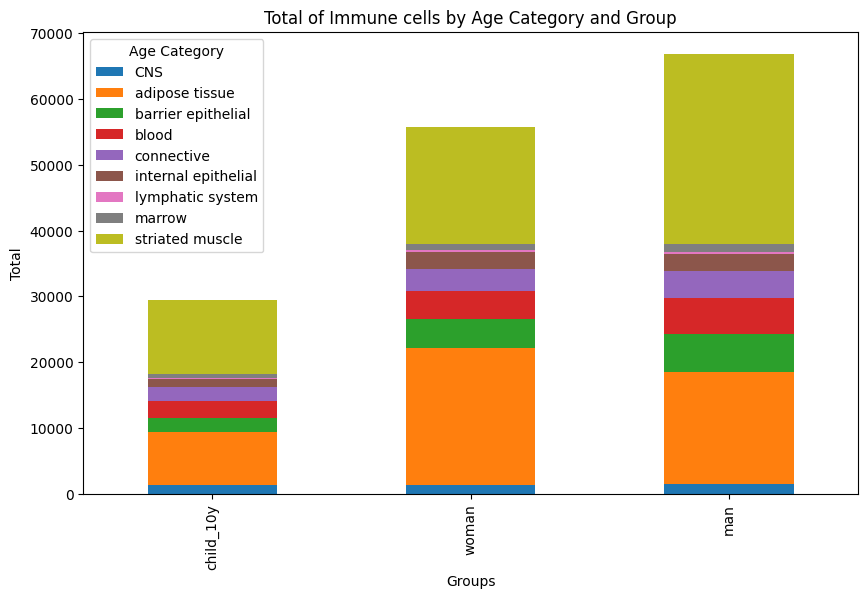

In [15]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('database.csv')

# Filter the columns and values you need
filtered_data = data[['groups', 'child_10y',  'woman', 'man']]

# Group by 'groups' and sum the values for each age category within each group
grouped_data = filtered_data.groupby('groups').sum()

# Display the new table
#print(grouped_data)
grouped_data = grouped_data.T
# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Groups')
plt.ylabel('Total')
plt.title('Total of Immune cells by Age Category and Group')
plt.legend(title='Age Category')
plt.show()



/tmp/ipykernel_8848/3289121417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_data.loc[:, 'child_percentage'] = (child_data['child_10y'] / total_child_cells) * 100
/tmp/ipykernel_8848/3289121417.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data.loc[:, 'women_percentage'] = (women_data['woman'] / total_women_cells) * 100
/tmp/ipykernel_8848/3289121417.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<Figure size 1200x800 with 0 Axes>

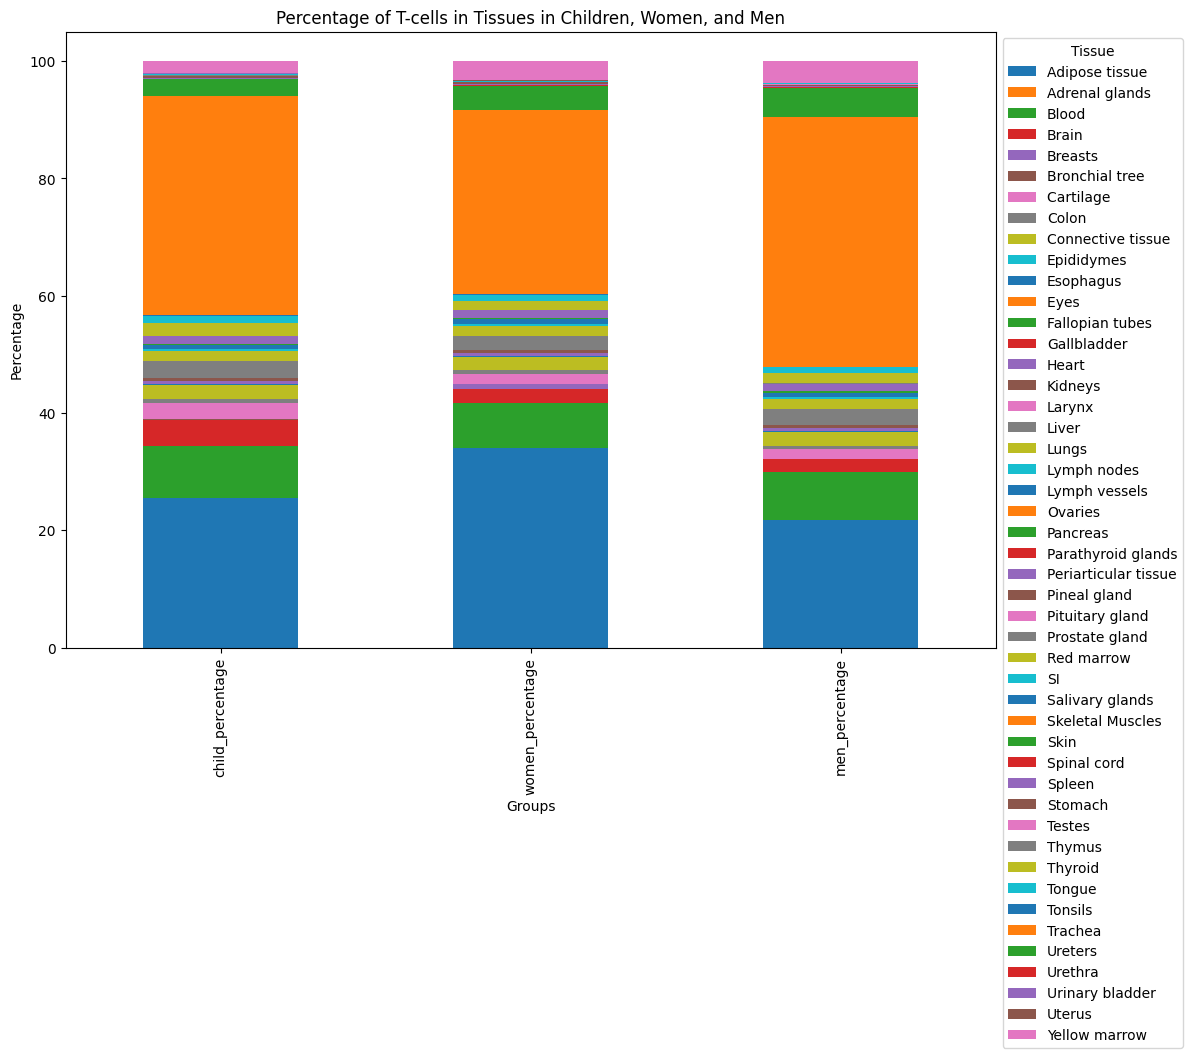

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('database.csv')

child_data = data[['tissue', 'child_10y']]
total_child_cells = child_data['child_10y'].sum()
child_data.loc[:, 'child_percentage'] = (child_data['child_10y'] / total_child_cells) * 100

women_data = data[['tissue', 'woman']]
total_women_cells = women_data['woman'].sum()
women_data.loc[:, 'women_percentage'] = (women_data['woman'] / total_women_cells) * 100

men_data = data[['tissue', 'man']]
total_men_cells = men_data['man'].sum()
men_data.loc[:, 'men_percentage'] = (men_data['man'] / total_men_cells) * 100

plt.figure(figsize=(12, 8))

# Reshape data for stacked bar plot
stacked_data_child = child_data[['tissue', 'child_percentage']].set_index('tissue').T
stacked_data_women = women_data[['tissue', 'women_percentage']].set_index('tissue').T
stacked_data_men = men_data[['tissue', 'men_percentage']].set_index('tissue').T

# Combine all datasets
combined_data = pd.concat([stacked_data_child, stacked_data_women, stacked_data_men])

# Plotting stacked bar for children, women, and men
combined_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of T-cells in Tissues in Children, Women, and Men')
plt.xlabel('Groups')
plt.ylabel('Percentage')
plt.legend(title='Tissue', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


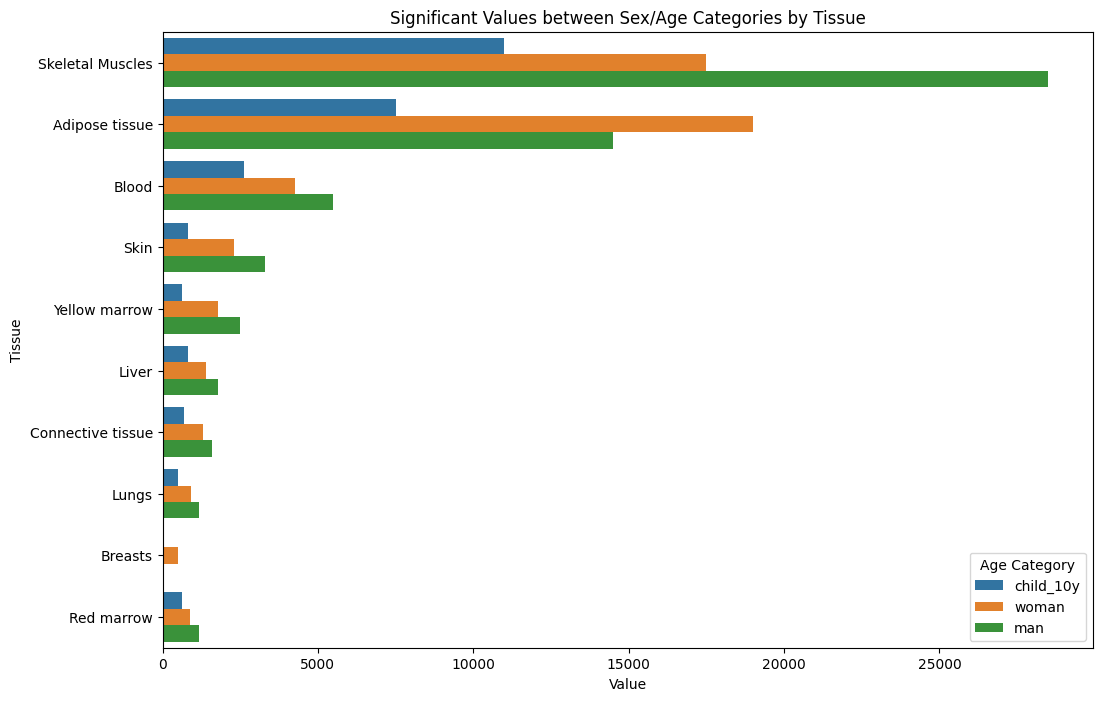

In [36]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ['#FFA07A', '#FFD700', '#20B2AA']
# Calculate standard deviation across age categories
age_categ
ories = ['child_10y', 'woman', 'man']
data['std_dev'] = data[age_categories].std(axis=1)

# Select top significant values (maximum 10) including tissues with 0 value
significant_values = data.nlargest(10, 'std_dev')

# Filter out tissues with 0 values in all age categories
significant_values = significant_values[significant_values[age_categories].any(axis=1)]

significant_values_pivot = significant_values.melt(id_vars='tissue', value_vars=age_categories, var_name='Age Category', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_values_pivot, y='tissue', x='Value', hue='Age Category', dodge=True)
plt.title('Density of cells between Sex/Age Categories by Tissue')
plt.xlabel('Value')
plt.ylabel('Tissue')
plt.legend(title='Age Category')
plt.show()


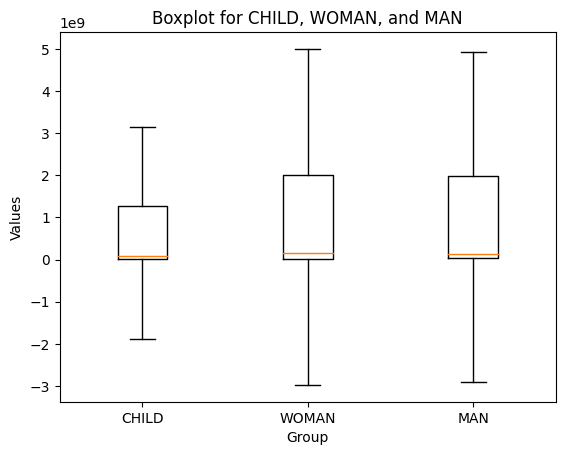

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

data = pd.read_csv('extracted_data.csv')

means = data.loc[data['Statistic'] == 'median'].iloc[:, -3:].values.flatten()
q1 = data.loc[data['Statistic'] == 'percentiles(25%)'].iloc[:, -3:].values.flatten()
q3_values = data.loc[data['Statistic'] == 'percentiles(75%)'].iloc[:, -3:].values.flatten()

# Calculate IQR for each group
iqr = q3 - q1

# Calculate whislo and whishi for each group using the formula: Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
whislo = q1 - 1.5 * iqr
whishi = q3 + 1.5 * iqr

keys = ['med', 'q1', 'q3', 'whislo', 'whishi']
stats = [dict(zip(keys, vals)) for vals in zip(means, q1, q3, whislo, whishi)]

# Create the boxplot
plt.subplot().bxp(stats, showfliers=False)

# Set x-axis labels for the boxplot
plt.xticks(ticks=[1, 2, 3], labels=['CHILD', 'WOMAN', 'MAN'])

plt.xlabel('Group')
plt.ylabel('Values')
plt.title('Boxplot for CHILD, WOMAN, and MAN')
plt.show()

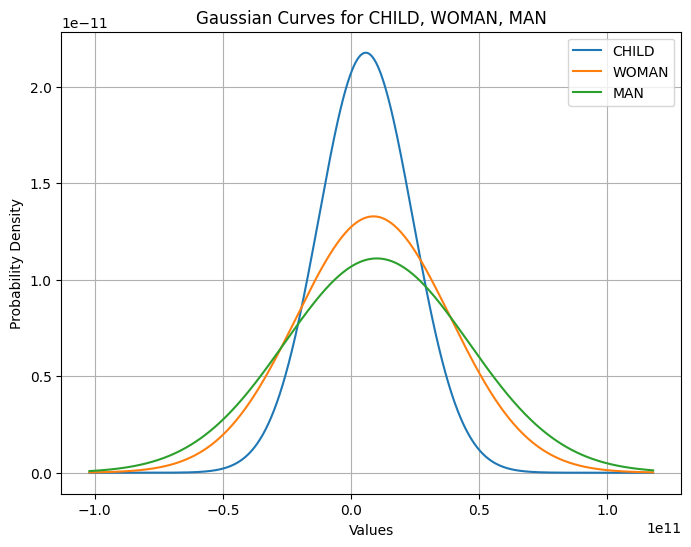

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load the data from the CSV file
data = pd.read_csv('extracted_data.csv')

# Extract means and variances for CHILD, WOMAN, MAN
means = data.loc[data['Statistic'] == 'mean'].iloc[:, -3:].values.flatten()
variances = data.loc[data['Statistic'] == 'variance'].iloc[:, -3:].values.flatten()

child_mean, woman_mean, man_mean = means[0], means[1], means[2]
child_var, woman_var, man_var = variances[0], variances[1], variances[2]

# Set the x-range based on means and standard deviations (sqrt(variance))
x = np.linspace(min(means) - 3 * np.sqrt(max(variances)), max(means) + 3 * np.sqrt(max(variances)), 1000)

# Calculate the Gaussian distributions
child_curve = norm.pdf(x, child_mean, np.sqrt(child_var))
woman_curve = norm.pdf(x, woman_mean, np.sqrt(woman_var))
man_curve = norm.pdf(x, man_mean, np.sqrt(man_var))

# Plotting the Gaussian curves
plt.figure(figsize=(8, 6))

plt.plot(x, child_curve, label='CHILD')
plt.plot(x, woman_curve, label='WOMAN')
plt.plot(x, man_curve, label='MAN')

plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Gaussian Curves for CHILD, WOMAN, MAN')
plt.legend()
plt.grid(True)
plt.show()


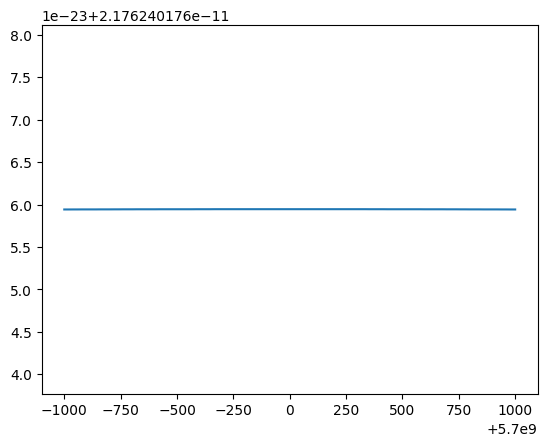

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 5.7e+09
variance = 3.36052e+20
sigma = math.sqrt(variance)
x = np.linspace(mu-1000, mu+1000, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()